In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("stock_price.csv")

In [3]:
df.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [4]:
df.tail()

,ds,y
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      204 non-null    object 
 1   y       204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [6]:
# convert ds into a date type
df['ds']=pd.to_datetime(df['ds'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      204 non-null    datetime64[ns]
 1   y       204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [8]:
df.set_index('ds',inplace=True)

In [10]:
df['y']

ds
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: y, Length: 204, dtype: float64

In [11]:
from matplotlib import style
style.use('ggplot')

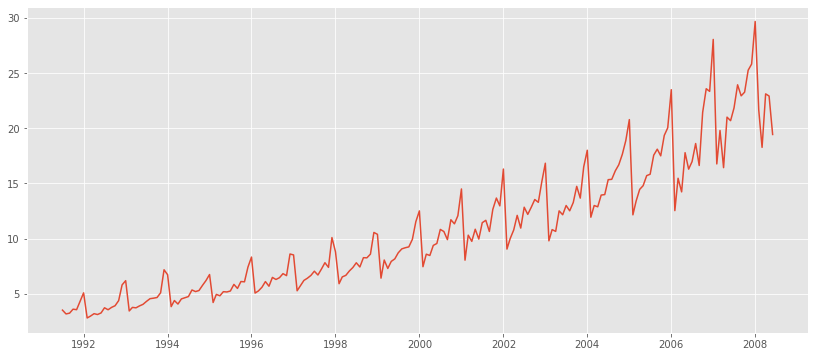

In [12]:
plt.figure(figsize=(14,6))
plt.plot(df['y'])
plt.show()

In [15]:
ts=df['y']

In [16]:
ts

ds
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: y, Length: 204, dtype: float64

In [13]:
# slice the data
import datetime

In [14]:
datetime.datetime(2007,1,1,0,0,0)

datetime.datetime(2007, 1, 1, 0, 0)

In [25]:
train_data=ts[ts.index<datetime.datetime(2005,1,1,0,0,0)]
test_data=ts[ts.index>=datetime.datetime(2005,1,1,0,0,0)]

In [26]:
train_data.tail()

ds
2004-08-01    15.370764
2004-09-01    16.142005
2004-10-01    16.685754
2004-11-01    17.636728
2004-12-01    18.869325
Name: y, dtype: float64

In [27]:
test_data.head()

ds
2005-01-01    20.778723
2005-02-01    12.154552
2005-03-01    13.402392
2005-04-01    14.459239
2005-05-01    14.795102
Name: y, dtype: float64

In [28]:
print(ts.shape)
print(train_data.shape)
print(test_data.shape)

(204,)
(162,)
(42,)


In [29]:
train_data

ds
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2004-08-01    15.370764
2004-09-01    16.142005
2004-10-01    16.685754
2004-11-01    17.636728
2004-12-01    18.869325
Name: y, Length: 162, dtype: float64

In [30]:
# check stationarity
from statsmodels.tsa.stattools import adfuller
# h0: the given series is not stationary
# h1: the given series is stationary

In [31]:
adfuller(train_data,autolag='AIC')

(2.228299680504993,
 0.9989049941867124,
 14,
 147,
 {'1%': -3.4756368462466662,
  '5%': -2.8814104466172608,
  '10%': -2.5773652982553568},
 260.9169725847082)

In [32]:
def check_stationarity(time_series):
    test_output = adfuller(time_series.dropna())
    output = pd.Series(test_output[0:4],index=['Test Statistics','p-Value','# Lags Used','# Observations'])
    for key,value in test_output[4].items():
        output['Critical Value (%s)'%key]=value
    print(output)
    
    plt.figure(figsize=(16,7))
    plt.plot(time_series)
    plt.show()

Test Statistics           2.228300
p-Value                   0.998905
# Lags Used              14.000000
# Observations          147.000000
Critical Value (1%)      -3.475637
Critical Value (5%)      -2.881410
Critical Value (10%)     -2.577365
dtype: float64


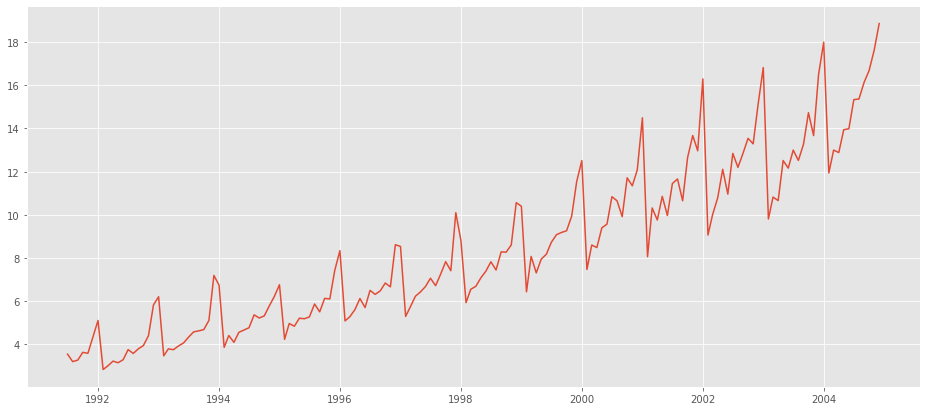

In [33]:
check_stationarity(train_data)

Test Statistics          -1.823426
p-Value                   0.368895
# Lags Used              13.000000
# Observations          147.000000
Critical Value (1%)      -3.475637
Critical Value (5%)      -2.881410
Critical Value (10%)     -2.577365
dtype: float64


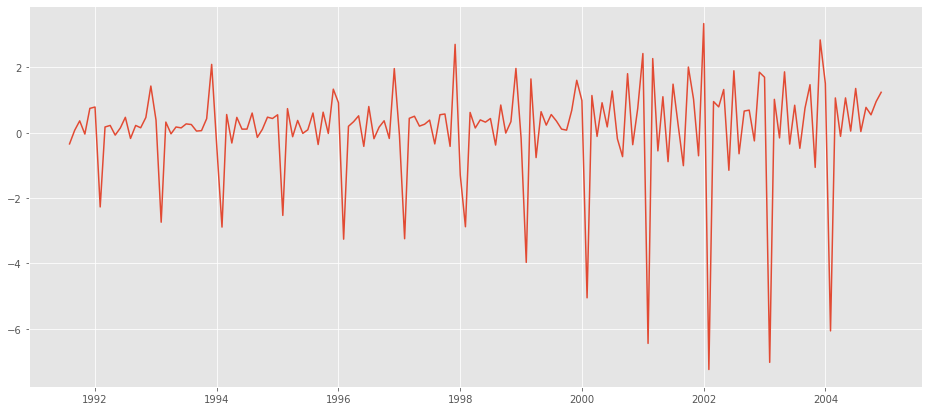

In [35]:
# as series is not stationary, trying differencing of 1 to make it stationary
check_stationarity(train_data.diff(1))

Test Statistics          -1.826994
p-Value                   0.367145
# Lags Used              12.000000
# Observations          147.000000
Critical Value (1%)      -3.475637
Critical Value (5%)      -2.881410
Critical Value (10%)     -2.577365
dtype: float64


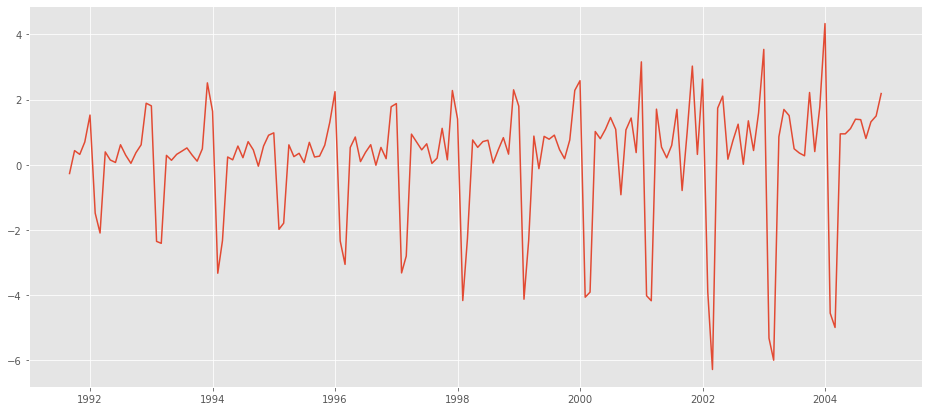

In [36]:
# as series is not stationary, trying differencing of 2 to make it stationary
check_stationarity(train_data.diff(2))

Test Statistics          -0.660497
p-Value                   0.856718
# Lags Used              14.000000
# Observations          147.000000
Critical Value (1%)      -3.475637
Critical Value (5%)      -2.881410
Critical Value (10%)     -2.577365
dtype: float64


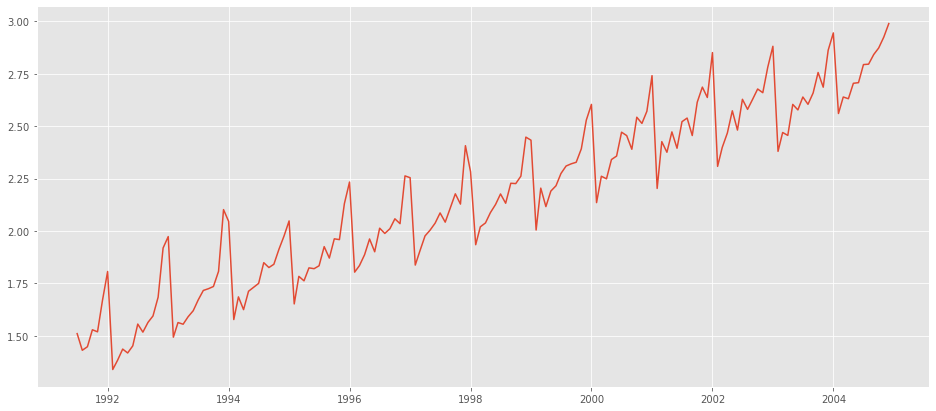

In [37]:
# as series is not stationary, trying log transformation to make it stationary
train_data_log = np.log1p(train_data)
check_stationarity(train_data_log)

Test Statistics          -3.827648
p-Value                   0.002637
# Lags Used              13.000000
# Observations          147.000000
Critical Value (1%)      -3.475637
Critical Value (5%)      -2.881410
Critical Value (10%)     -2.577365
dtype: float64


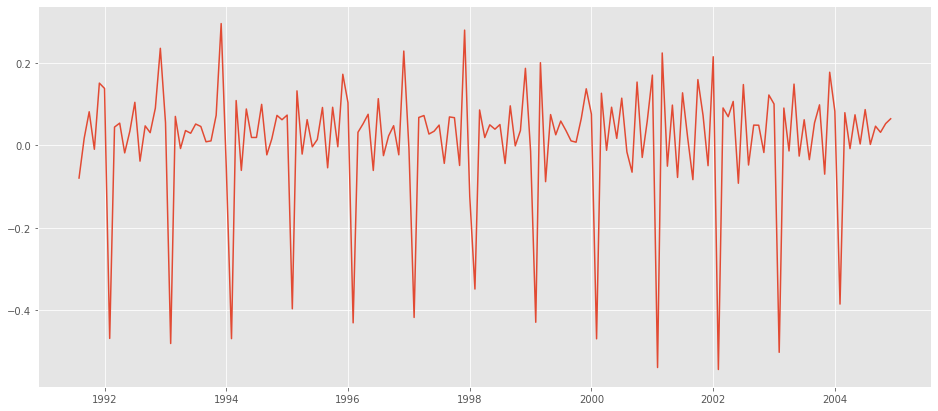

In [38]:
# as series is not stationary, trying log transformation and differencing of 1 to make it stationary
check_stationarity(train_data_log.diff(1))

In [40]:
train_data.head(3)

ds
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
Name: y, dtype: float64

In [42]:
train_data_log.head(3)

ds
1991-07-01    1.509969
1991-08-01    1.430524
1991-09-01    1.447441
Name: y, dtype: float64

In [49]:
## Inverse Operation

z=np.log1p(3)
print(z)

np.exp(z)-1

1.3862943611198906


3.0

In [50]:
test_data_log=np.log1p(test_data)

In [52]:
# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

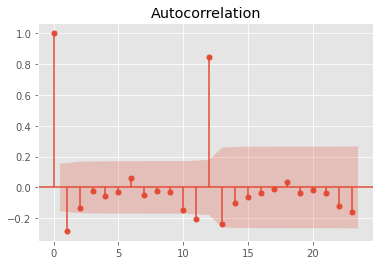

In [55]:
plot_acf(train_data_log.diff(1).dropna())
plt.show()

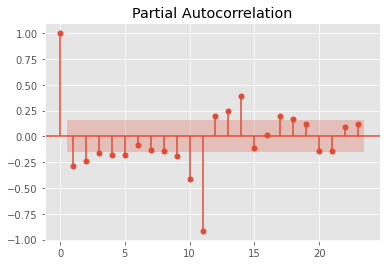

In [56]:
plot_pacf(train_data_log.diff(1).dropna())
plt.show()

In [57]:
# Build an AR Model
from statsmodels.tsa.arima_model import ARIMA

In [59]:
model = ARIMA(train_data_log,order=(1,1,0)) # Order = (p,d,q)  => p is # lags ; d is differencing and q is # prev error

result=model.fit()

In [60]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  78.059
Method:                       css-mle   S.D. of innovations              0.149
Date:                Sat, 07 Jan 2023   AIC                           -150.118
Time:                        15:54:57   BIC                           -140.874
Sample:                    08-01-1991   HQIC                          -146.365
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.009      1.006      0.314      -0.009       0.027
ar.L1.D.y     -0.2811      0.075     -3.727      0.000      -0.429      -0.133
                                    Roots           

- forecast : ndarray
    Array of out of sample forecasts
- stderr : ndarray
    Array of the standard error of the forecasts.
- conf_int : ndarray
    2d array of the confidence interval for the forecast

In [61]:
# forecast value
result.forecast(steps=3)

(array([2.98300279, 2.99656814, 3.00458422]),
 array([0.14896656, 0.18346392, 0.21860252]),
 array([[2.69103369, 3.27497188],
        [2.63698546, 3.35615082],
        [2.57613115, 3.43303729]]))

In [63]:
pred=result.forecast(steps=3)[0]

In [64]:
pred_transformed = np.exp(pred)-1

In [65]:
pred_transformed

array([18.74702378, 19.01672426, 19.17782477])

In [66]:
train_data.tail()

ds
2004-08-01    15.370764
2004-09-01    16.142005
2004-10-01    16.685754
2004-11-01    17.636728
2004-12-01    18.869325
Name: y, dtype: float64

In [71]:
test_data.shape[0]

42

In [72]:
test_data_pred = result.forecast(steps=test_data.shape[0])[0]

In [74]:
test_data_pred_transformed = np.exp(test_data_pred)-1

In [77]:
testPred=pd.Series(test_data_pred_transformed,index=test_data.index)

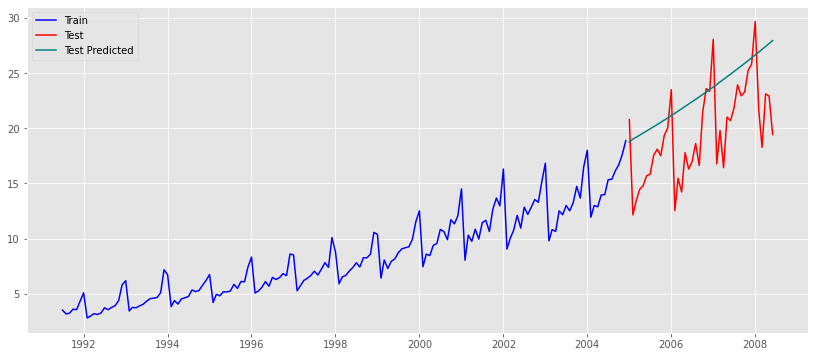

In [78]:
plt.figure(figsize=(14,6))
plt.plot(train_data,label='Train',color="blue")
plt.plot(test_data,label='Test',color="red")
plt.plot(testPred,label='Test Predicted',color="teal")
plt.legend()
plt.show()

In [124]:
def getPrediction(fittedModel_result,train_data,test_data):
    test_data_pred = fittedModel_result.forecast(steps=test_data.shape[0])[0]
    test_data_pred_transformed = np.exp(test_data_pred)-1
    testPred=pd.Series(test_data_pred_transformed,index=test_data.index)
    
    plt.figure(figsize=(14,6))
    plt.plot(train_data,label='Train',color="blue")
    plt.plot(test_data,label='Test',color="red")
    plt.plot(testPred,label='Test Predicted',color="teal")
    plt.legend()
    plt.show()
    return(testPred)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                ARIMA(10, 1, 0)   Log Likelihood                 109.524
Method:                       css-mle   S.D. of innovations              0.121
Date:                Sat, 07 Jan 2023   AIC                           -195.048
Time:                        16:18:36   BIC                           -158.071
Sample:                    08-01-1991   HQIC                          -180.034
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.002      5.156      0.000       0.005       0.012
ar.L1.D.y     -0.5961      0.072     -8.290      0.000      -0.737      -0.455
ar.L2.D.y     -0.5850      0.080     -7.326      0.0

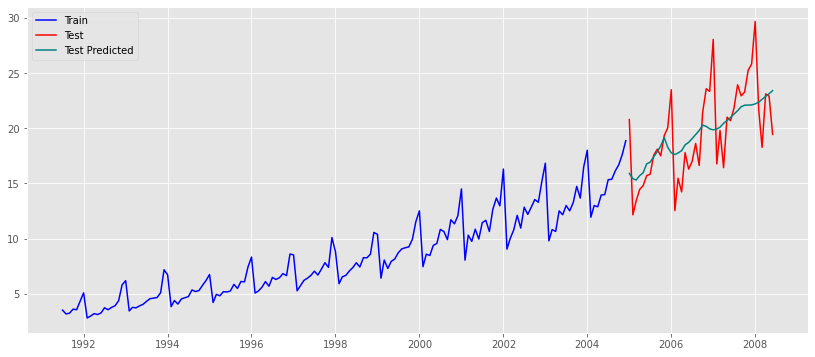

In [84]:
model = ARIMA(train_data_log,order=(10,1,0)) # Order = (p,d,q)  => p is # lags ; d is differencing and q is # prev error

result=model.fit()
print(result.summary())
getPrediction(result,train_data,test_data)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 108.076
Method:                       css-mle   S.D. of innovations              0.122
Date:                Sat, 07 Jan 2023   AIC                           -200.153
Time:                        16:18:46   BIC                           -175.501
Sample:                    08-01-1991   HQIC                          -190.143
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.000     43.503      0.000       0.008       0.009
ar.L1.D.y      0.2875      0.078      3.664      0.000       0.134       0.441
ar.L2.D.y     -0.0887      0.081     -1.097      0.2

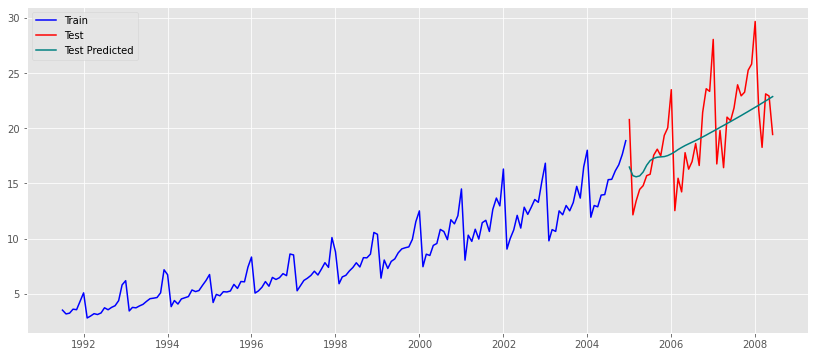

In [85]:
# Build AR(I)MA model
model = ARIMA(train_data_log,order=(5,1,1)) # Order = (p,d,q)  => p is # lags ; d is differencing and q is # prev error

result=model.fit()
print(result.summary())
getPrediction(result,train_data,test_data)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 103.570
Method:                       css-mle   S.D. of innovations              0.125
Date:                Sat, 07 Jan 2023   AIC                           -199.139
Time:                        16:19:40   BIC                           -186.814
Sample:                    08-01-1991   HQIC                          -194.135
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.000     27.653      0.000       0.008       0.009
ar.L1.D.y      0.3060      0.076      4.040      0.000       0.158       0.454
ma.L1.D.y     -1.0000      0.016    -63.076      0.0

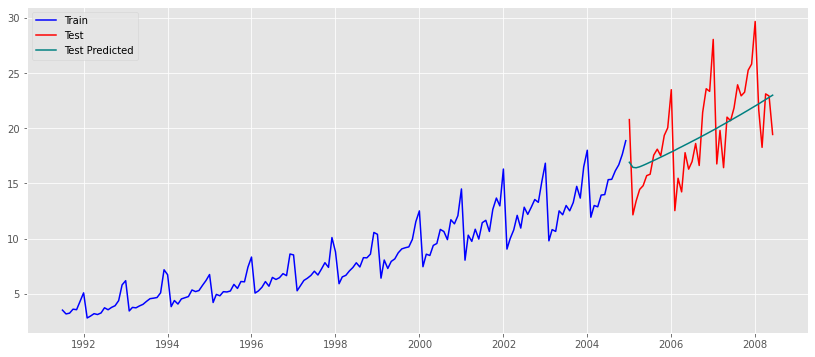

In [86]:
# choosing only one LAG for AR as others are not significant based on p-value
# Build AR(I)MA model
model = ARIMA(train_data_log,order=(1,1,1)) # Order = (p,d,q)  => p is # lags ; d is differencing and q is # prev error

result=model.fit()
print(result.summary())
getPrediction(result,train_data,test_data)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                 ARIMA(0, 1, 3)   Log Likelihood                 104.142
Method:                       css-mle   S.D. of innovations              0.125
Date:                Sat, 07 Jan 2023   AIC                           -198.284
Time:                        16:20:30   BIC                           -182.877
Sample:                    08-01-1991   HQIC                          -192.028
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.000     28.968      0.000       0.008       0.009
ma.L1.D.y     -0.6678      0.081     -8.254      0.000      -0.826      -0.509
ma.L2.D.y     -0.2878      0.094     -3.075      0.0

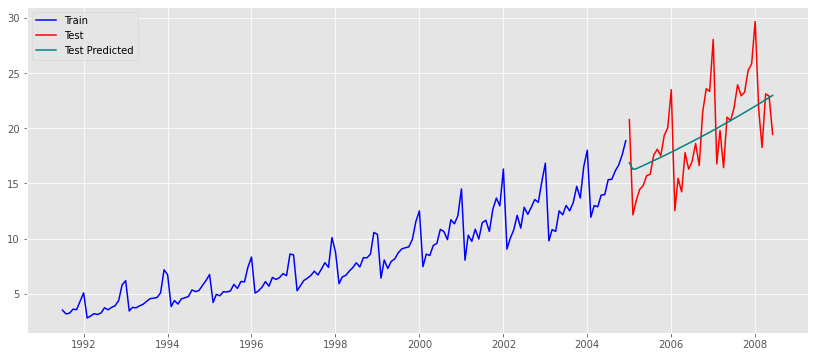

In [87]:
# MA model
# Build AR(I)MA model
model = ARIMA(train_data_log,order=(0,1,3)) # Order = (p,d,q)  => p is # lags ; d is differencing and q is # prev error

result=model.fit()
print(result.summary())
getPrediction(result,train_data,test_data)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  89.251
Method:                       css-mle   S.D. of innovations              0.139
Date:                Sat, 07 Jan 2023   AIC                           -164.503
Time:                        16:26:25   BIC                           -142.933
Sample:                    08-01-1991   HQIC                          -155.745
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.004      2.025      0.043       0.000       0.018
ar.L1.D.y     -0.4401      0.078     -5.670      0.000      -0.592      -0.288
ar.L2.D.y     -0.3734      0.083     -4.511      0.0

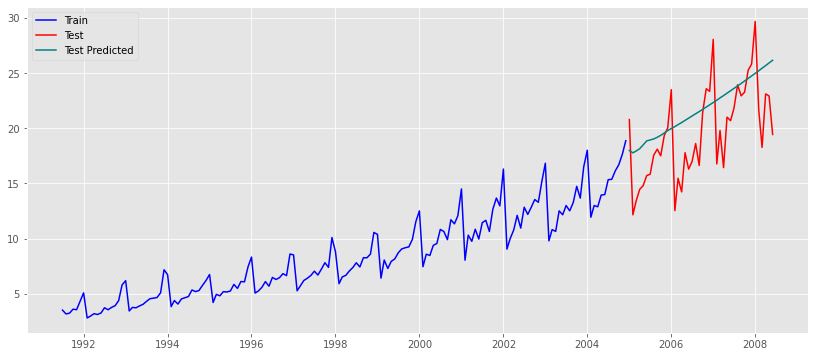

In [97]:
# Build AR(I)MA model
model = ARIMA(train_data_log,order=(5,1,0)) # Order = (p,d,q)  => p is # lags ; d is differencing and q is # prev error

result=model.fit()
print(result.summary())
getPrediction(result,train_data,test_data)

# Decomposition

In [98]:
train_data

ds
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2004-08-01    15.370764
2004-09-01    16.142005
2004-10-01    16.685754
2004-11-01    17.636728
2004-12-01    18.869325
Name: y, Length: 162, dtype: float64

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [101]:
decomposed = seasonal_decompose(train_data) # dafault method is additive

In [116]:
trend=decomposed.trend
seasonal = decomposed.seasonal
resid = decomposed.resid

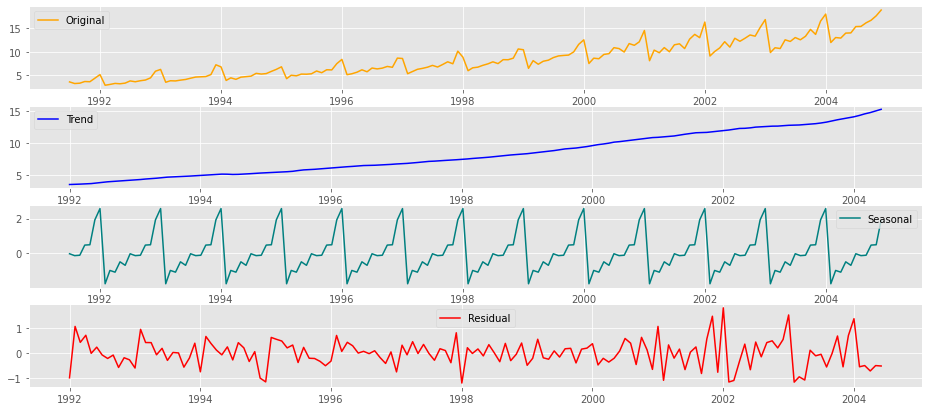

In [105]:
plt.figure(figsize=(16,7))
plt.subplot(411)
plt.plot(train_data, label="Original",color="orange")
plt.legend()
plt.subplot(412)
plt.plot(trend, label="Trend",color="blue")
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label="Seasonal",color="teal")
plt.legend()
plt.subplot(414)
plt.plot(resid, label="Residual",color="red")
plt.legend()
plt.show()


In [133]:
trend.head(20)

ds
1991-07-01         NaN
1991-08-01         NaN
1991-09-01         NaN
1991-10-01         NaN
1991-11-01         NaN
1991-12-01         NaN
1992-01-01    3.503344
1992-02-01    3.527891
1992-03-01    3.565511
1992-04-01    3.600447
1992-05-01    3.647703
1992-06-01    3.744571
1992-07-01    3.853234
1992-08-01    3.925737
1992-09-01    3.985022
1992-10-01    4.039856
1992-11-01    4.094329
1992-12-01    4.159203
1993-01-01    4.215740
1993-02-01    4.281620
Name: trend, dtype: float64

Test Statistics          -3.501938
p-Value                   0.007937
# Lags Used              11.000000
# Observations          137.000000
Critical Value (1%)      -3.479007
Critical Value (5%)      -2.882878
Critical Value (10%)     -2.578149
dtype: float64


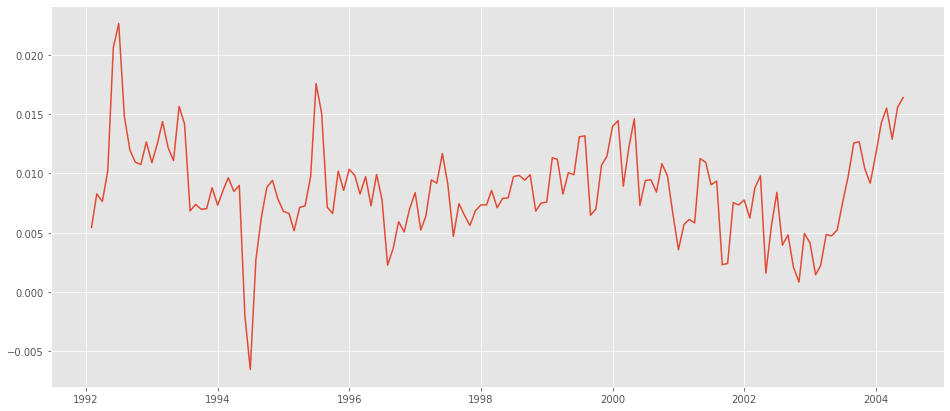

In [119]:
# Trend
trend_log = np.log1p(trend.dropna())
check_stationarity(trend_log.diff(1))

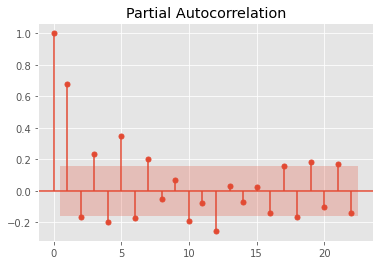

In [120]:
plot_pacf(trend_log.diff(1).dropna())
plt.show()

In [121]:
trend_log=trend_log.dropna()

In [122]:
model_trend = ARIMA(trend_log,order=(1,1,0))
res_trend =model_trend.fit()
print(res_trend.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.trend   No. Observations:                  149
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 660.759
Method:                       css-mle   S.D. of innovations              0.003
Date:                Sat, 07 Jan 2023   AIC                          -1315.519
Time:                        16:39:31   BIC                          -1306.507
Sample:                    02-01-1992   HQIC                         -1311.857
                         - 06-01-2004                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0087      0.001     11.690      0.000       0.007       0.010
ar.L1.D.trend     0.6881      0.060     11.415      0.000       0.570       0.806
                                    Root

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [129]:
test_trend_pred=res_trend.forecast(42)[0]

In [134]:
trend_log

ds
1992-01-01    1.504820
1992-02-01    1.510256
1992-03-01    1.518530
1992-04-01    1.526153
1992-05-01    1.536373
                ...   
2004-02-01    2.725748
2004-03-01    2.741256
2004-04-01    2.754139
2004-05-01    2.769720
2004-06-01    2.786123
Name: trend, Length: 150, dtype: float64

In [ ]:
test

Test Statistics        -4.559790e+15
p-Value                 0.000000e+00
# Lags Used             1.400000e+01
# Observations          1.470000e+02
Critical Value (1%)    -3.475637e+00
Critical Value (5%)    -2.881410e+00
Critical Value (10%)   -2.577365e+00
dtype: float64


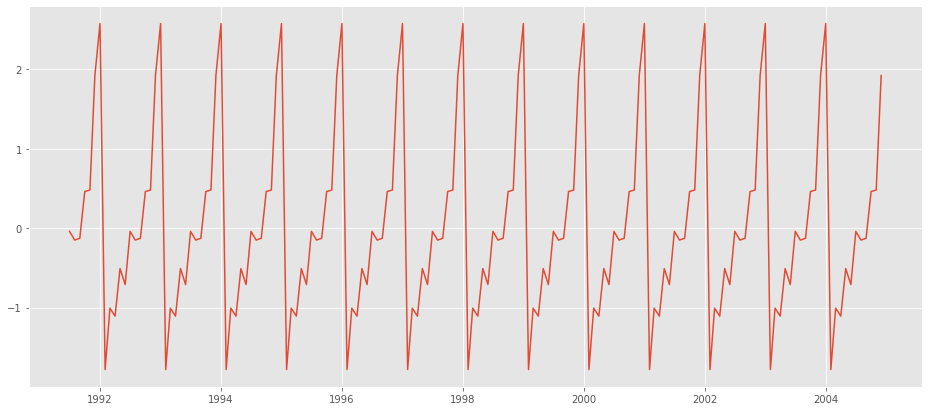

In [135]:
# Seasonal
check_stationarity(seasonal)

/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


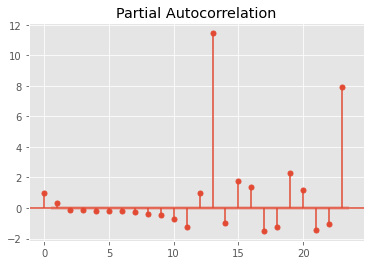

In [136]:
plot_pacf(seasonal)
plt.show()

In [137]:
model_seasonal=ARIMA(seasonal,order=(10,0,0))
res_seasonal=model_seasonal.fit()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [138]:
print(res_seasonal.summary())

                              ARMA Model Results                              
Dep. Variable:               seasonal   No. Observations:                  162
Model:                    ARMA(10, 0)   Log Likelihood                -159.760
Method:                       css-mle   S.D. of innovations              0.629
Date:                Sat, 07 Jan 2023   AIC                            343.520
Time:                        17:19:33   BIC                            380.571
Sample:                    07-01-1991   HQIC                           358.563
                         - 12-01-2004                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0007      0.009     -0.084      0.933      -0.018       0.016
ar.L1.seasonal     -0.3387      0.058     -5.799      0.000      -0.453      -0.224
ar.L2.seasonal     -0.5157      

Test Statistics        -5.862686e+00
p-Value                 3.381370e-07
# Lags Used             1.100000e+01
# Observations          1.380000e+02
Critical Value (1%)    -3.478648e+00
Critical Value (5%)    -2.882722e+00
Critical Value (10%)   -2.578065e+00
dtype: float64


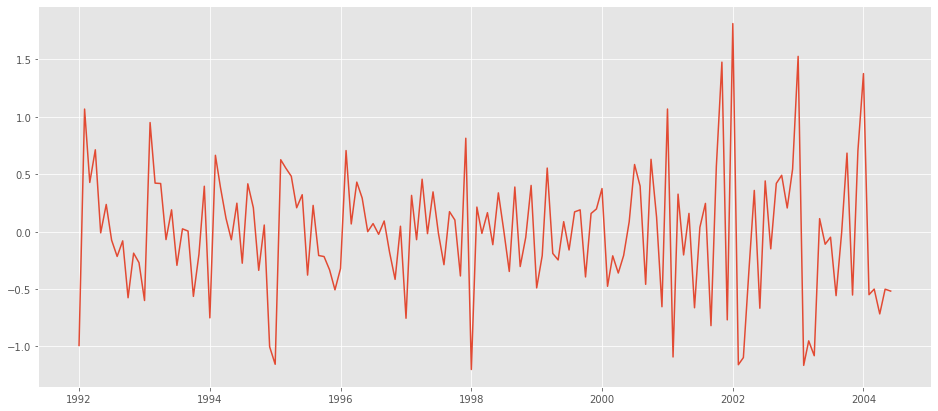

In [111]:
# Residual
check_stationarity(resid)

In [140]:
resid

ds
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
              ..
2004-08-01   NaN
2004-09-01   NaN
2004-10-01   NaN
2004-11-01   NaN
2004-12-01   NaN
Name: resid, Length: 162, dtype: float64

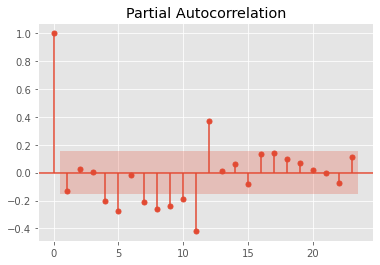

In [141]:
plot_pacf(resid.fillna(0))
plt.show()

In [143]:
resid.fillna(0,inplace=True)

In [148]:
model_resid=ARIMA(resid,order=(11,0,0))
res_resid=model_resid.fit()
print(res_resid.summary())

                              ARMA Model Results                              
Dep. Variable:                  resid   No. Observations:                  162
Model:                    ARMA(11, 0)   Log Likelihood                 -83.595
Method:                       css-mle   S.D. of innovations              0.399
Date:                Sat, 07 Jan 2023   AIC                            193.189
Time:                        17:24:21   BIC                            233.328
Sample:                    07-01-1991   HQIC                           209.486
                         - 12-01-2004                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0048      0.006     -0.842      0.400      -0.016       0.006
ar.L1.resid     -0.4444      0.071     -6.275      0.000      -0.583      -0.306
ar.L2.resid     -0.3171      0.074     -4.26

In [152]:
# Forecast values for test data
trend_pred=np.exp(res_trend.forecast(steps=48)[0])-1 # forecasting for 48 values as first 6 values will represent train data itself
seasonal_pred=res_seasonal.forecast(steps=42)[0]
resid_pred = res_resid.forecast(steps=48)[0] # forecasting for 48 values as first 6 values will represent train data itself

In [154]:
# decomposing test data
dc = seasonal_decompose(test_data)
test_trend = dc.trend
test_seasonal = dc.seasonal
test_resid = dc.resid

In [156]:
trend_pred=pd.Series(trend_pred).tail(42)
trend_pred.index=test_trend.index

In [157]:
seasonal_pred=pd.Series(seasonal_pred,index=test_seasonal.index)


In [158]:
resid_pred=pd.Series(resid_pred).tail(42)
resid_pred.index=test_resid.index

In [159]:
test_data_pred = trend_pred + seasonal_pred + resid_pred

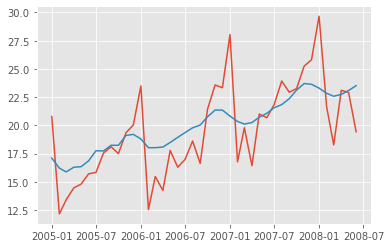

In [163]:
plt.plot(test_data)
plt.plot(test_data_pred)
plt.show()

In [164]:
!pip install fbprophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 26.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 KB 25.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 KB 4.3 MB/s eta 0:00:00
     

In [ ]:
from 